# Mutagenèse
Dans ces expériences, un génome aléatoire est généré en respectant ou non les hypothèses suivantes :
- le génome est homogène (tous les segments non codants ont la même longueur)
- le génome est unidirectionnel

A chaque itération, on applique une mutation donnée, on vérifie sa neutralité et on détermine ses caractéristiques (longueur par exemple).
Cela se fait pour diverses valeurs de $g$, $z_c$ et $z_{nc}$

Sur les graphiques, les barres autour des points représentent la variance de l'estimateur qui est la variance de l'échantillon sur la taille de l'échantillon $\left(\frac{\sigma²}{n}\right)$.

## Imports, objets et fonctions

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
class Results:
    def __init__(self, power_min, power_max):
        self.power_min, self.power_max = power_min, power_max
        results_length = self.power_max - self.power_min + 1

        self.x_values = np.empty(results_length, dtype="int")

        self.neutral_proportions = np.empty(results_length, dtype="float")
        self.neutral_proportiond_stds = np.empty(results_length, dtype="float")

        self.theoretical_proportions = np.empty(results_length, dtype="float")

        self.length_means = np.empty(results_length, dtype="float")
        self.length_means_stds = np.empty(results_length, dtype="float")

        self.theoretical_lengths = np.empty(results_length, dtype="float")

    def load_results(self, folder):
        d_results = {}
        for exposant in range(self.power_min, self.power_max + 1):
            with open(f"{folder}/{exposant}.json") as json_file:
                d_results[exposant] = json.load(json_file)
        for index, (exposant, results) in enumerate(d_results.items()):
            self.x_values[index] = float(f"1e{exposant}")
            self.neutral_proportions[index] = results["Neutral mutations proportion"]
            self.neutral_proportiond_stds[index] = results[
                "Neutral mutations standard deviation of proportion estimator"
            ]

            self.theoretical_proportions[index] = results["Neutral probability theory"]

            self.length_means[index] = results["Length mean"]
            self.length_means_stds[index] = results[
                "Length standard deviation of mean estimator"
            ]

            self.theoretical_lengths[index] = results["Length mean theory"]


results = Results(1, 7)

## $g$ variable, rapports $\frac{g}{z_c}$ et $\frac{g}{z_{nc}}$ constants (égaux à 1000)
### Génome homogène et unidirectionnel

#### Mutations ponctuelles

In [5]:
experiment_name = "model"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Point mutation")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Point Mutation neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Point Mutation neutral proportion")

plt.legend()
plt.show()
plt.close()

FileNotFoundError: [Errno 2] No such file or directory: 'results/mutagenese/model/stats/Point mutation/1.json'

La proportion de mutations ponctuelles neutres est indépendante de $g$, conformément au modèle mathématiques. Dans ce cas, cette proportion est égale à 0,5.

#### Petites Insertions

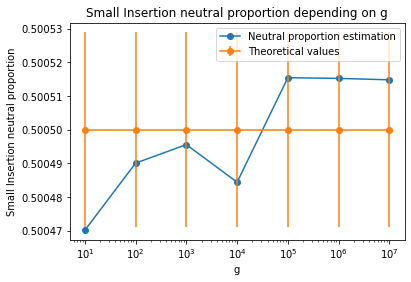

In [4]:
experiment_name = "model"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Small insertion")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Insertion neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Small Insertion neutral proportion")

plt.legend()
plt.show()
plt.close()

La proportion de petites insertions neutres est indépendante de $g$, conformément au modèle mathématiques. Dans ce cas, cette proportion est égale à 0,5005.

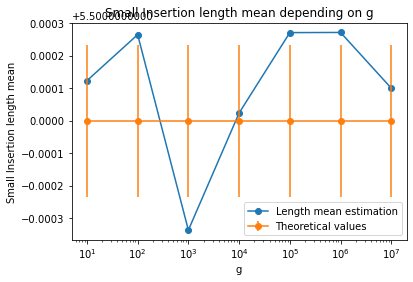

In [5]:
plt.clf()

plt.plot(
    results.x_values, results.length_means, marker="o", label="Length mean estimation"
)
plt.errorbar(
    results.x_values,
    results.theoretical_lengths,
    results.length_means_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Insertion length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Small Insertion length mean")

plt.legend()
plt.show()
plt.close()

Les longueurs moyennes des mutations sont conformes au modèle, indépendantes de $g$ et égales à 5,5

#### Petites Délétions

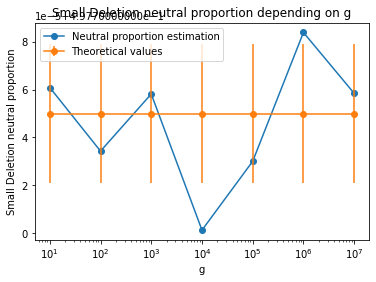

In [6]:
experiment_name = "model"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Small deletion")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Deletion neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Small Deletion neutral proportion")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèle.

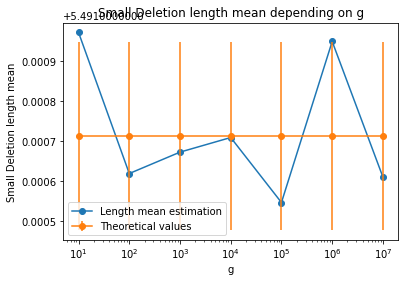

In [7]:
plt.clf()

plt.plot(
    results.x_values, results.length_means, marker="o", label="Length mean estimation"
)
plt.errorbar(
    results.x_values,
    results.theoretical_lengths,
    results.length_means_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Deletion length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Small Deletion length mean")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèle.

#### Duplications

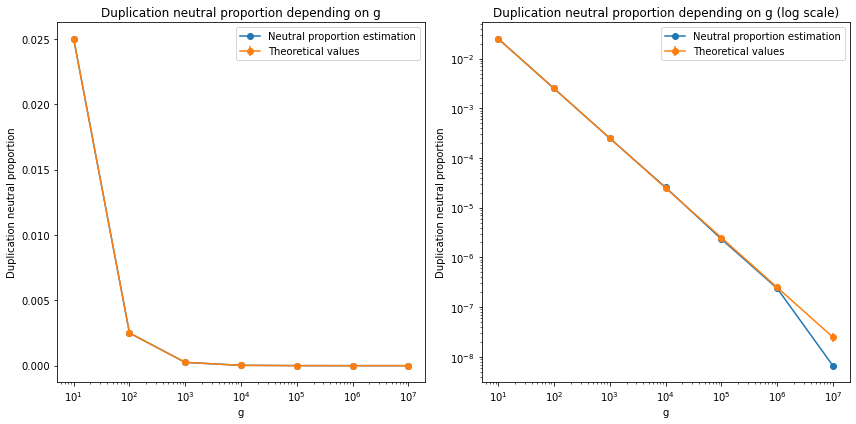

In [8]:
experiment_name = "model"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Duplication")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Duplication neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Duplication neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Duplication neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Duplication neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

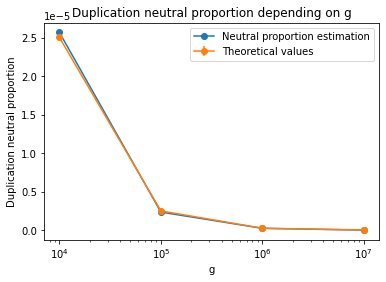

In [9]:
cut = 3
plt.clf()

plt.plot(
    results.x_values[cut:],
    results.neutral_proportions[cut:],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[cut:],
    results.theoretical_proportions[cut:],
    results.neutral_proportiond_stds[cut:],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication neutral proportion")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèles.

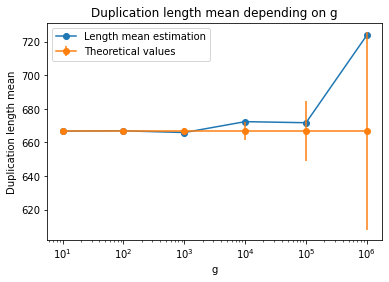

In [10]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication length mean")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèles.

#### Deletions

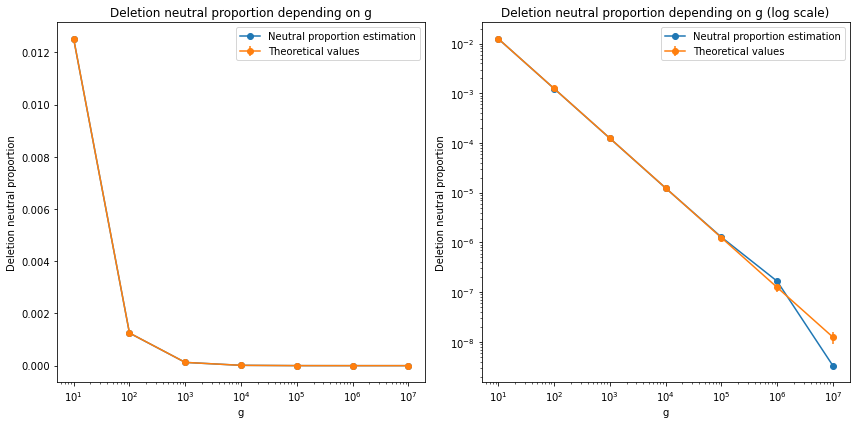

In [11]:
experiment_name = "model"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Deletion")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Deletion neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Deletion neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Deletion neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Deletion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

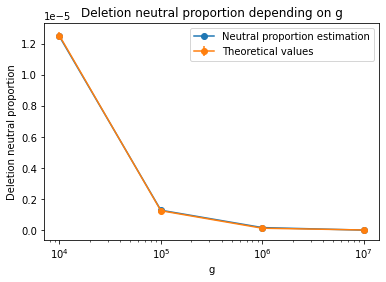

In [12]:
cut = 3
plt.clf()

plt.plot(
    results.x_values[cut:],
    results.neutral_proportions[cut:],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[cut:],
    results.theoretical_proportions[cut:],
    results.neutral_proportiond_stds[cut:],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Deletion neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Deletion neutral proportion")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèles.

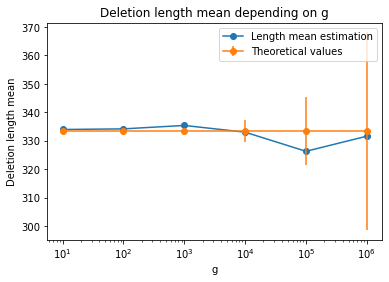

In [13]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Deletion length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Deletion length mean")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèles.

#### Inversions

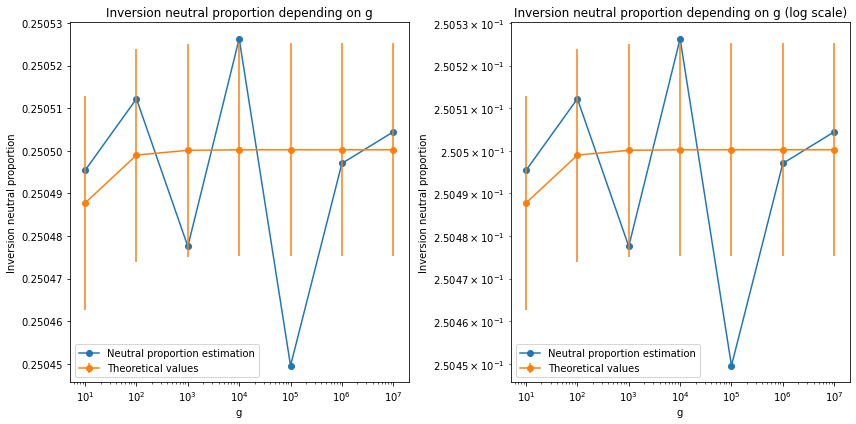

In [14]:
experiment_name = "model"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Inversion")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Inversion neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Inversion neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Inversion neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Inversion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

Les observations sont conformes au modèles.

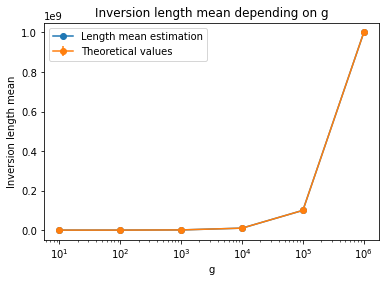

In [15]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Inversion length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Inversion length mean")

plt.legend()
plt.show()
plt.close()

La formule théorique est une approximation...

### Génome non homogène mais unidirectionnel

#### Mutations ponctuelles
La proportion de bases non codante est le seul déterminant de la proportion de la neutralité des mutations ponctuelles. L'homogénéité du génome n'affecte pas cette proportion, donc les conclusions sur les mutations ponctuelles restent inchangées.
#### Petites Insertions
De la même manière, l'hétérogénéité du génome n'affecte pas les petites insertions car leur seul déterminant de proportion de neutralité sont les positions d'insertions. Les longueurs sont également non affectées.
#### Petites Délétions

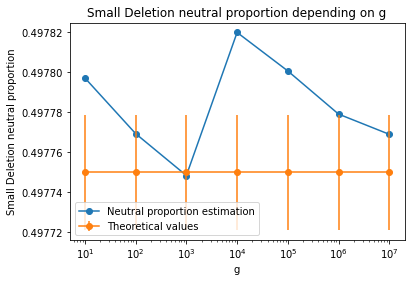

In [16]:
experiment_name = "non_homogeneous"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Small deletion")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Deletion neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Small Deletion neutral proportion")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèle la non hmogénéité n'a pas d'effet détectable sur les petites délétions.

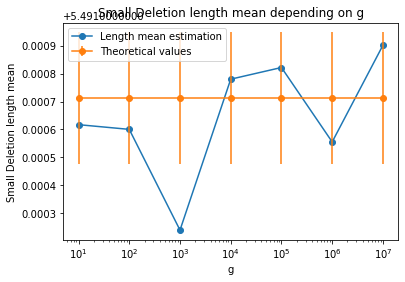

In [17]:
plt.clf()

plt.plot(
    results.x_values, results.length_means, marker="o", label="Length mean estimation"
)
plt.errorbar(
    results.x_values,
    results.theoretical_lengths,
    results.length_means_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Deletion length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Small Deletion length mean")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèle la non hmogénéité n'a pas d'effet détectable sur les petites délétions.

#### Duplications

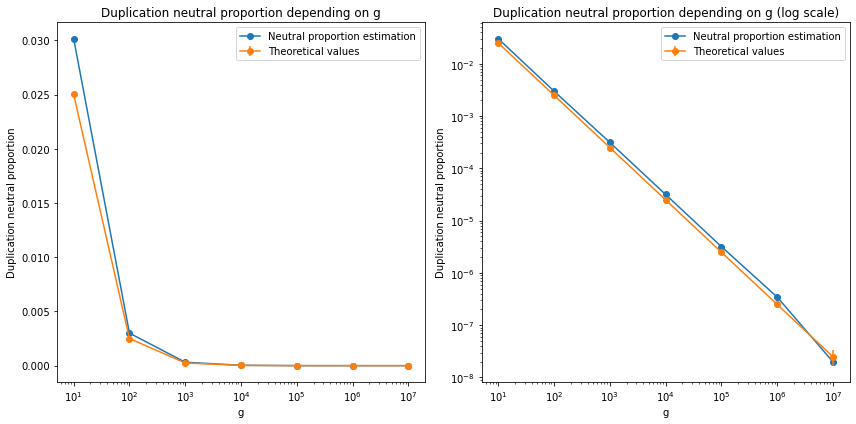

In [18]:
experiment_name = "non_homogeneous"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Duplication")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Duplication neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Duplication neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Duplication neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Duplication neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

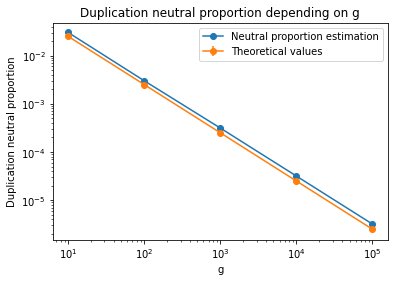

In [19]:
cut = -2
plt.clf()

plt.plot(
    results.x_values[:cut],
    results.neutral_proportions[:cut],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_proportions[:cut],
    results.neutral_proportiond_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication neutral proportion")
plt.yscale("log")

plt.legend()
plt.show()
plt.close()

On observe un léger biais négatif du modèle pour la proportion de duplications neutres en cas de génome non homogène.

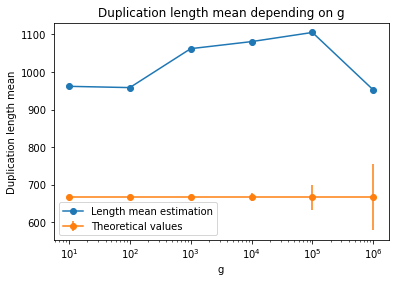

In [20]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication length mean")

plt.legend()
plt.show()
plt.close()

On observe un biais négatif du modèle d'environ 400 bp sur les longueurs moyennes des duplications neutres (pour rappel : $z_c = z_{nc} = 1000g$)

#### Deletions

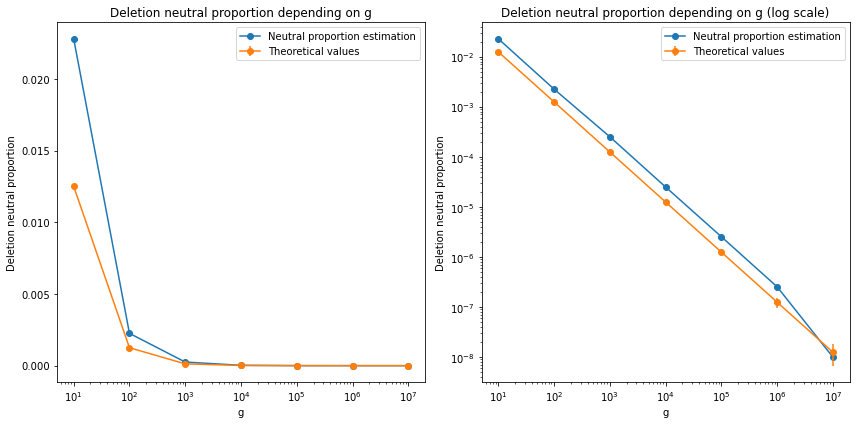

In [21]:
experiment_name = "non_homogeneous"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Deletion")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Deletion neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Deletion neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Deletion neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Deletion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

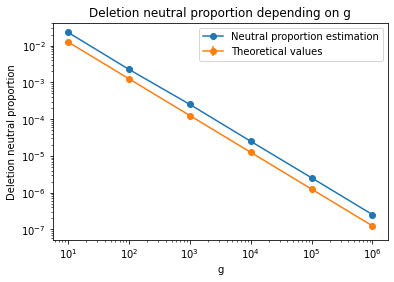

In [22]:
cut = -1
plt.clf()

plt.plot(
    results.x_values[:cut],
    results.neutral_proportions[:cut],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_proportions[:cut],
    results.neutral_proportiond_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Deletion neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Deletion neutral proportion")
plt.yscale("log")

plt.legend()
plt.show()
plt.close()

Le modèle mathématique présente un biais négatif pour la proportion de délétions neutres.

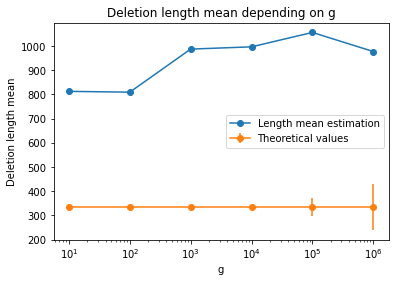

In [23]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Deletion length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Deletion length mean")

plt.legend()
plt.show()
plt.close()

Le modèle présente un biais d'environ 600 bp sur la longueur moyenne des délétions neutres.

#### Inversions
La proportion d'inversion neutre ne devrait pas être affectée par l'hétérogénéité du génome car les deux points de cassure sont considérés indépendants l'un de l'autre (mis à part le fait qu'ils sont différents). En revanche les longueurs moyennes peuvent être affectées.

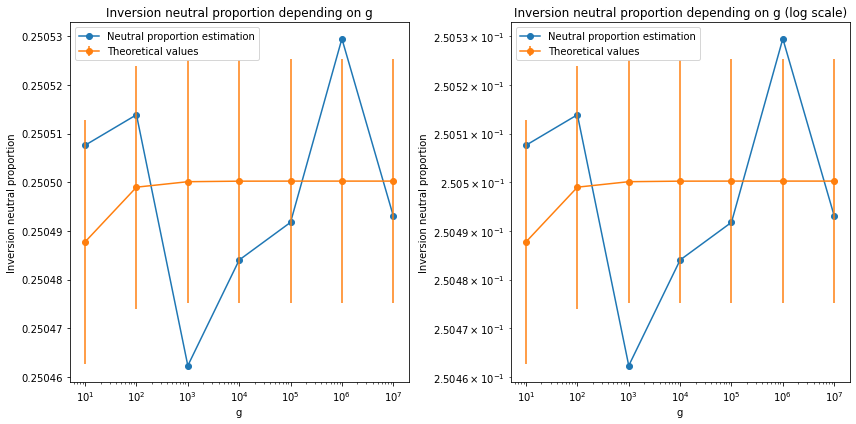

In [24]:
experiment_name = "non_homogeneous"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Inversion")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Inversion neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Inversion neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Inversion neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Inversion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

L'hypothèse d'homogénéité du génome n'affecte pas la proportion d'inversions neutres.

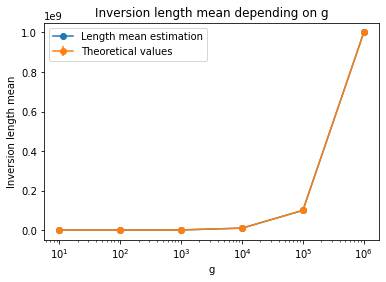

In [25]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Inversion length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Inversion length mean")

plt.legend()
plt.show()
plt.close()

La longueur des inversions ne semble pas affectée.

### Génome homogène et pluridirectionnel

#### Point Mutations
Les mutations ponctuelles ne sont pas affectées par l'orientation des gènes.
#### Small Insertions 
Les petites insertions ne sont pas affectées par l'orientation des gènes.
#### Small Deletions
Les petites délétions ne sont pas affectées par l'orientation des gènes.
#### Duplications

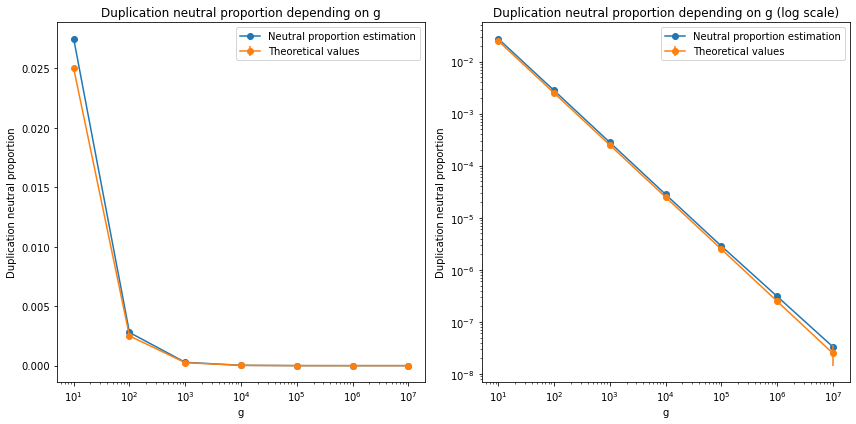

In [26]:
experiment_name = "oriented"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Duplication")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Duplication neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Duplication neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Duplication neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Duplication neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

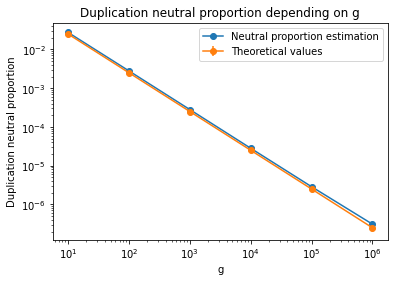

In [27]:
cut = -1
plt.clf()

plt.plot(
    results.x_values[:cut],
    results.neutral_proportions[:cut],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_proportions[:cut],
    results.neutral_proportiond_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication neutral proportion")
plt.yscale("log")

plt.legend()
plt.show()
plt.close()

On observe un léger biais négatif du modèle pour la proportion de duplications neutres pour un génome pluridirectionnel. 

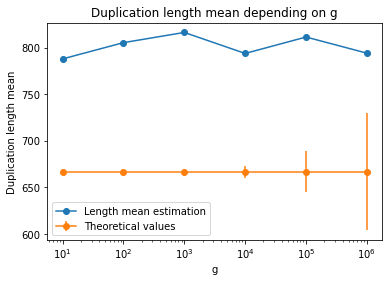

In [28]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication length mean")

plt.legend()
plt.show()
plt.close()

On observe un biais négatif du modèle pour la longueur des duplications d'environ 150 bp, pour un génome pluri directionnel.
#### Deletions
Les délétions ne sont pas affectées par l'orientation des gènes.

#### Inversions
Les inversions modifient l'orientation des gènes mais ne sont pas affectées par cette dernières.

### Génome non homogène et pluri directionnel

#### Point Mutations
Les mutations ponctuelles ne sont affectées ni par l'homogénéité ou non du génome ni par l'orientation des gènes.
#### Small Insertions
Les petites insertions ne sont pas affectées par l'orientation des gènes. Ce cas revient donc au cas du génome non homogène unidirectionnel.
#### Small Deletions
Les petites délétions ne sont pas affectées par l'orientation des gènes. Ce cas revient donc au cas du génome non homogène unidirectionnel.

#### Duplications

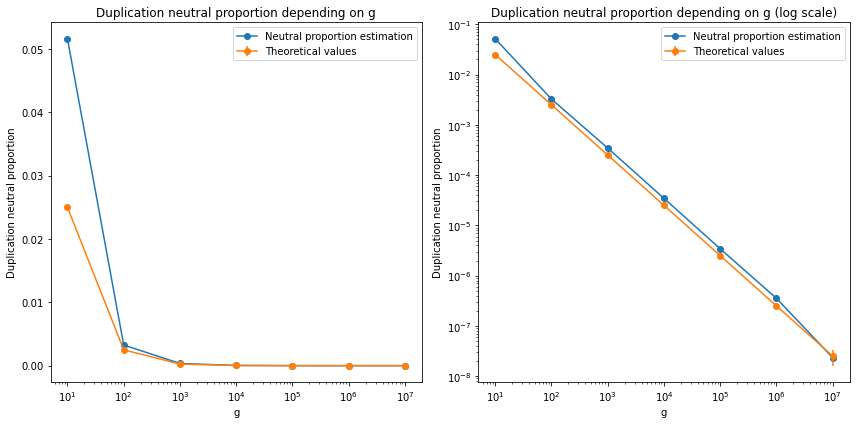

In [29]:
experiment_name = "wild"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Duplication")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Duplication neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Duplication neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Duplication neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Duplication neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

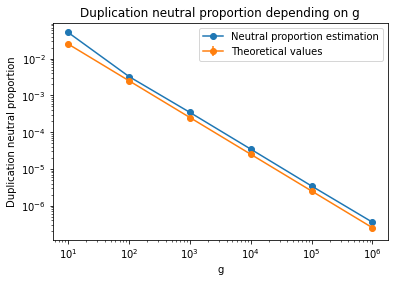

In [30]:
cut = -1
plt.clf()

plt.plot(
    results.x_values[:cut],
    results.neutral_proportions[:cut],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_proportions[:cut],
    results.neutral_proportiond_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication neutral proportion")
plt.yscale("log")

plt.legend()
plt.show()
plt.close()

On observe un biais négatif du modèle.

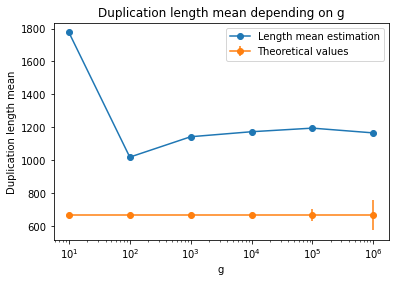

In [31]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication length mean")

plt.legend()
plt.show()
plt.close()

On observe un biais négatif du modèle mathématique d'environ 400 bp pour la longueur moyenne des dupplications.
#### Deletions
Les délétions ne sont pas affectées par l'orientation des gènes. Ce cas revient donc au cas du génome non homogène unidirectionnel.
#### Inversions
Les inversions ne sont pas affectées par l'orientation des gènes. Ce cas revient donc au cas du génome non homogène unidirectionnel.
## Conclusion sur les hypothèse pour des rapports $\frac{z_c}{g}$ et $\frac{z_{nc}}{g}$ constants


Les hypothèses d'homogénéité et d'unidirectionnalité du génome introduisent un biais négatif sur la proportion de mutation neutre et sur leur longueur moyenne.

## Rapport duplication sur délétion
### Sous les hypothèses du modèle

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


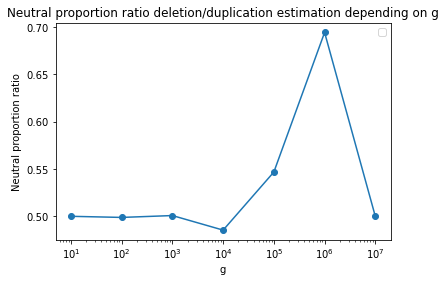

In [32]:
results_duplication = Results(1, 7)
results_deletion = Results(1, 7)

experiment_name = "model"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results_duplication.load_results(f"{results_path}/Duplication")
results_deletion.load_results(f"{results_path}/Deletion")
results = results_deletion.neutral_proportions / results_duplication.neutral_proportions

plt.plot(results_duplication.x_values, results, marker="o")

plt.title(f"Neutral proportion ratio deletion/duplication estimation depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Neutral proportion ratio")

plt.legend()

plt.show()

Les délétions sont environ deux fois moins neutres que les duplications dans le modèle mathématiques.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


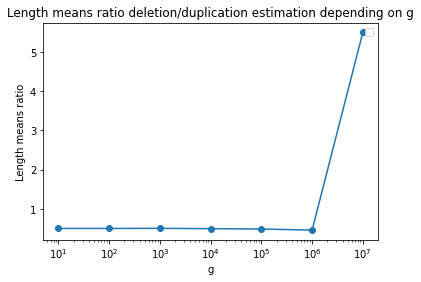

In [33]:
results = results_deletion.length_means / results_duplication.length_means

plt.plot(results_duplication.x_values, results, marker="o")

plt.title(f"Length means ratio deletion/duplication estimation depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Length means ratio")

plt.legend()

plt.show()

Les longueurs des délétions sont en moyennes deux fois plus faibles que celles des duplications sous les hypothèses du modèle mathématiques.

### Sans l'hypothèse d'homogénéité

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


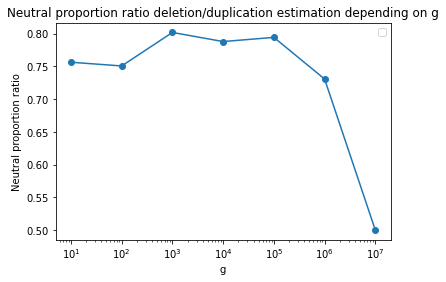

In [34]:
results_duplication = Results(1, 7)
results_deletion = Results(1, 7)

experiment_name = "non_homogeneous"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results_duplication.load_results(f"{results_path}/Duplication")
results_deletion.load_results(f"{results_path}/Deletion")
results = results_deletion.neutral_proportions / results_duplication.neutral_proportions

plt.plot(results_duplication.x_values, results, marker="o")

plt.title(f"Neutral proportion ratio deletion/duplication estimation depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Neutral proportion ratio")

plt.legend()
plt.show()

Sans l'hypothèse d'homogénéité, les délétions ne sont plus que légèrement moins neutres que les duplications.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


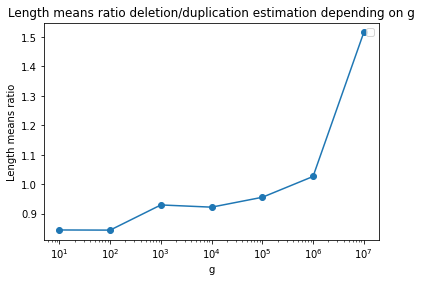

In [35]:
results = results_deletion.length_means / results_duplication.length_means

plt.plot(results_duplication.x_values, results, marker="o")

plt.title(f"Length means ratio deletion/duplication estimation depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Length means ratio")

plt.legend()

plt.show()

Sans l'hypothèse d'homogénéité, les longueurs moyennes des délétions sont très légèrement plus faibles que celles des duplications.

### Sans l'hypothèse d'unidirectionnalité

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


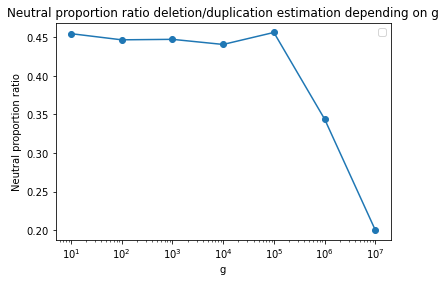

In [36]:
results_duplication = Results(1, 7)
results_deletion = Results(1, 7)

experiment_name = "oriented"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results_duplication.load_results(f"{results_path}/Duplication")
results_deletion.load_results(f"{results_path}/Deletion")
results = results_deletion.neutral_proportions / results_duplication.neutral_proportions

plt.plot(results_duplication.x_values, results, marker="o")

plt.title(f"Neutral proportion ratio deletion/duplication estimation depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Neutral proportion ratio")

plt.legend()
plt.show()

Sans l'hypothèse d'unidirectionnalité, les inversions sont un peu plus délétères par rapport au duplications que dans le modèle mathématiques. En effet, cette hypothèse n'affecte que les duplications, en augmentant leur proportion de neutralité.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


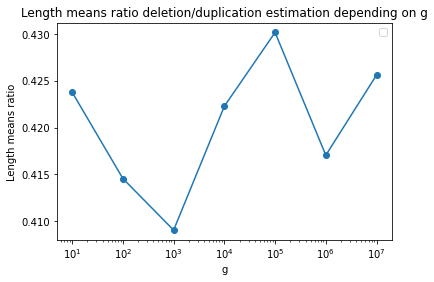

In [37]:
results = results_deletion.length_means / results_duplication.length_means

plt.plot(results_duplication.x_values, results, marker="o")

plt.title(f"Length means ratio deletion/duplication estimation depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Length means ratio")

plt.legend()

plt.show()

De même, le rapport des longueurs est plus faible sans l'hypothèse d'unidirectionnalité qu'avec.

### Dans un génome hétérogène et orienté

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


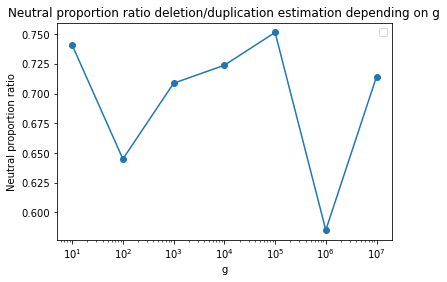

In [38]:
results_duplication = Results(1, 7)
results_deletion = Results(1, 7)

experiment_name = "wild"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results_duplication.load_results(f"{results_path}/Duplication")
results_deletion.load_results(f"{results_path}/Deletion")
results = results_deletion.neutral_proportions / results_duplication.neutral_proportions

plt.plot(results_duplication.x_values, results, marker="o")

plt.title(f"Neutral proportion ratio deletion/duplication estimation depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Neutral proportion ratio")

plt.legend()

plt.show()

Sans les hypothèses d'homogénéité et d'unidirectionnalité, le rapport de neutralité entre délétions et duplications est légèrement plus élevé.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


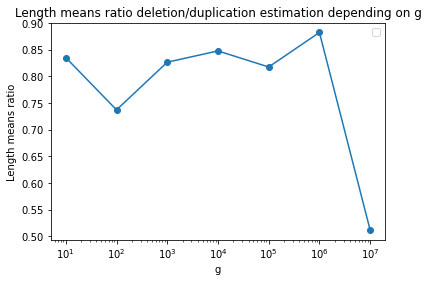

In [39]:
results = results_deletion.length_means / results_duplication.length_means

plt.plot(results_duplication.x_values, results, marker="o")

plt.title(f"Length means ratio deletion/duplication estimation depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Length means ratio")

plt.legend()

plt.show()

Sans les hypothèses d'homogénéité et d'unidirectionnalité, le rapport des longueurs entre délétions et duplications est plus élevé.